<a href="https://colab.research.google.com/github/ElsieOtube/AI/blob/main/search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

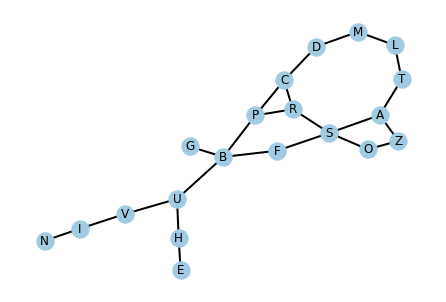

In [1]:
# nodes: A, B, C, D, E, F, G, Z, O, S, R, P, L, M, T, N, I, V, U, G, H, E
# edges: A-Z 75, A-T 118, A-S 140, Z-O 71, O-S 151, T-L 111, L-M 70, M-D 75, S-R 80, R-P 97, R-C 146, D-C 120, C-P 138, S-F 99, F-B 211, P-B 101, B-G 90, B-U 85, U-V 142, V-I 92, I-N 87, U-H 98, H-E 86, E-G, G-I, I-E

graph = {
    'A': ['Z', 'T', 'S'],
    'B': ['G', 'U', 'P', 'F'],
    'C': ['P', 'R', 'D'],
    'D': ['C', 'M'],
    'E': ['H'],
    'F': ['B', 'S'],
    'G': ['B',],
    'H': ['U', 'E'],
    'I': ['N', 'V'],
    'L': ['M', 'T'],
    'M': ['D', 'L'],
    'N': ['I'],
    'O': ['Z', 'S'],
    'P': ['B', 'R', 'C'],
    'R': ['C', 'S', 'P'],
    'S': ['A', 'F', 'O', 'R'],
    'T': ['A', 'L'],
    'U': ['B', 'V', 'H'],
    'V': ['I', 'U'],
    'Z': ['A', 'O']
}


# before implementing any search algorithms, we need to define the goal node and the starting node
start = 'A'         # A for Arad
goal = 'B'          # B for Bucharest

# we can also visualize the graph using networkx with nodes in light blue and edges in black, also no overlapping of edges
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for node in graph:
    for neighbour in graph[node]:
        G.add_edge(node, neighbour, color='black')
pos = nx.spring_layout(G)
colors = [G[u][v]['color'] for u,v in G.edges()]
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.show()


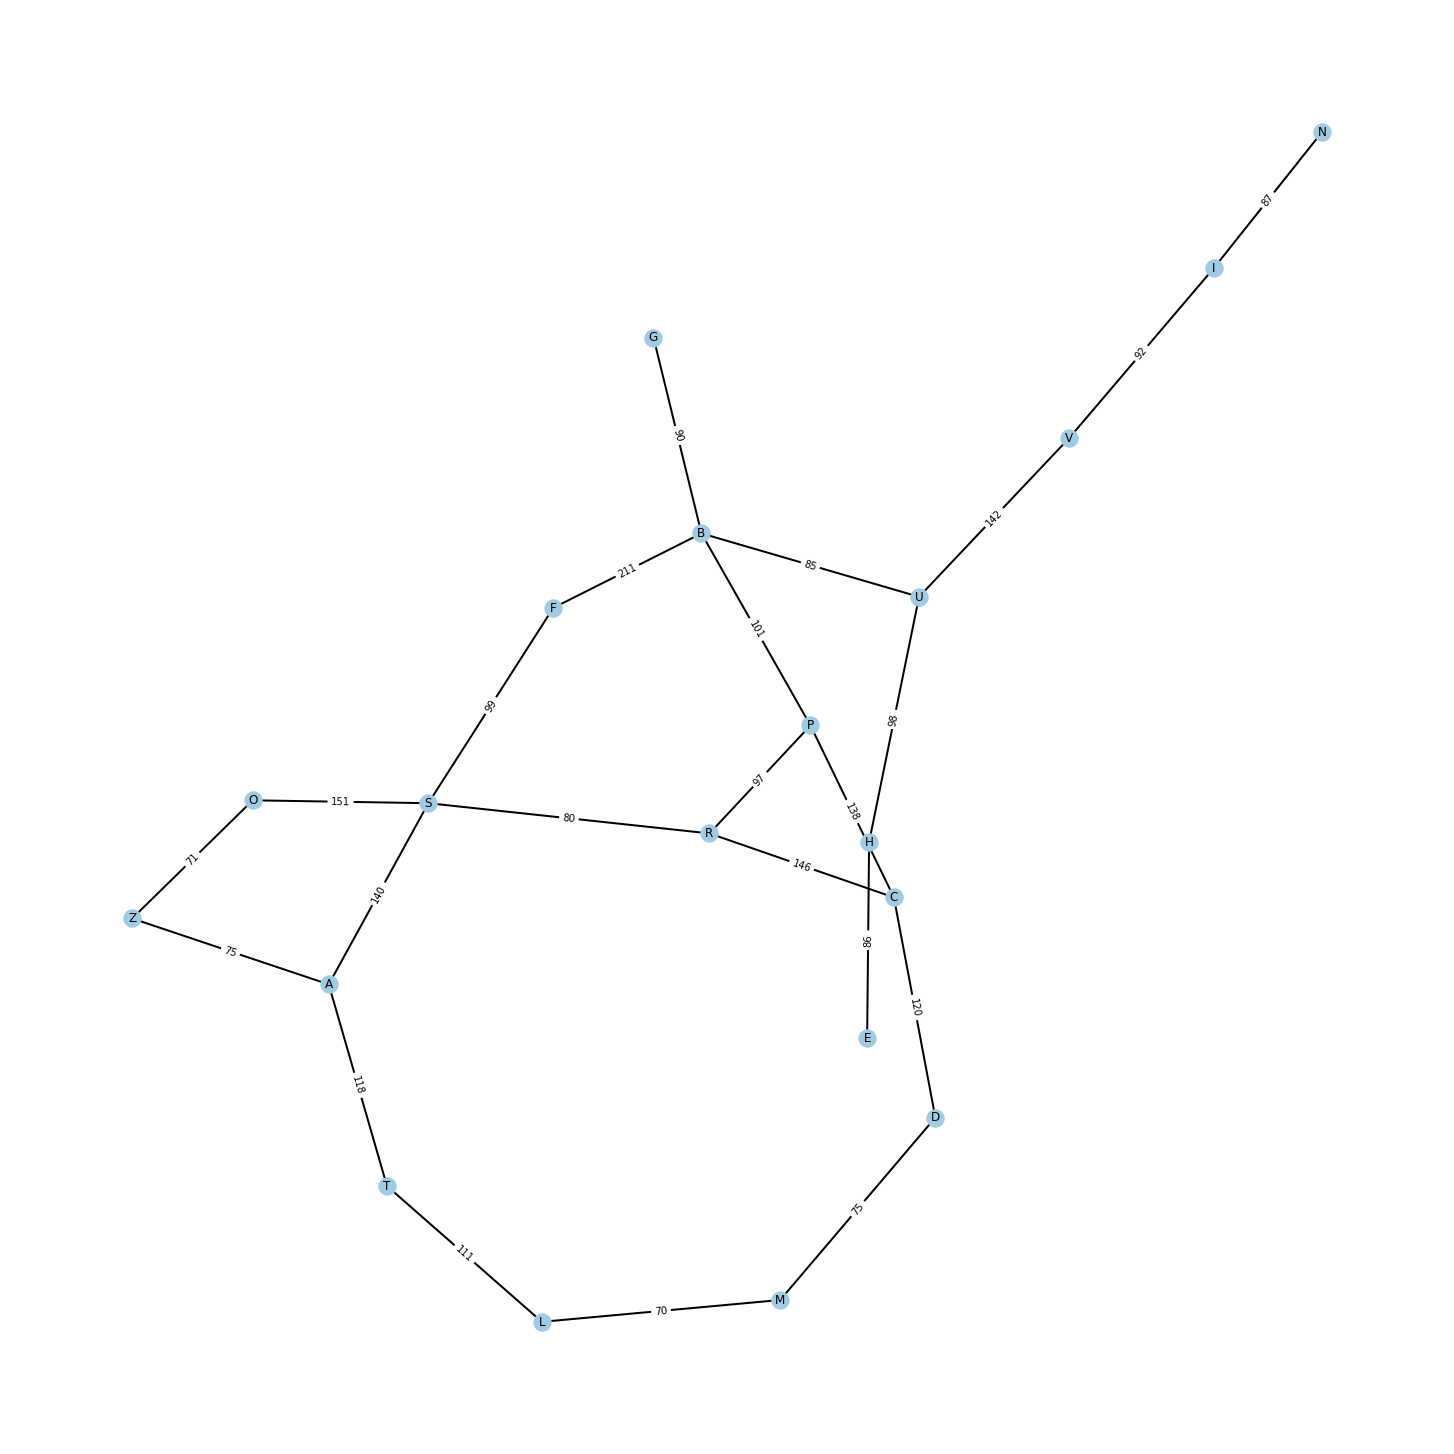

In [2]:
weighted_graph = {
    'A': {'Z': 75, 'T': 118, 'S': 140},
    'Z': {'O': 71, 'A': 75},
    'O': {'S': 151, 'Z': 71},
    'T': {'L': 111, 'A': 118},
    'L': {'M': 70, 'T': 111},
    'M': {'D': 75, 'L': 70},
    'S': {'R': 80, 'F': 99, 'O': 151, 'A': 140},
    'R': {'P': 97, 'C': 146, 'S': 80},
    'D': {'C': 120, 'M': 75},
    'C': {'P': 138, 'R': 146, 'D': 120},
    'F': {'B': 211, 'S': 99},
    'P': {'B': 101, 'R': 97, 'C': 138},
    'B': {'G': 90, 'U': 85, 'P': 101, 'F': 211},
    'U': {'V': 142, 'H': 98, 'B': 85},
    'V': {'I': 92, 'U': 142},
    'I': {'N': 87, 'E': 87},
    'H': {'E': 86, 'U': 98},
    'E': {'H': 86,},
    'G': {'B': 90},
    'I': {'N': 87},
}

# weighted graph visualization, with weights on edges
plt.figure(figsize=(20, 20))

G = nx.Graph()
for node in weighted_graph:
    for neighbour in weighted_graph[node]:
        G.add_edge(node, neighbour, weight=weighted_graph[node][neighbour])
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, node_color='#A0CBE2', edge_color='black', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


------

we have 2 main search algorithms categories, these can then be looked at in more detail

1. Uninformed Search
    - Breadth First Search
    - Depth First Search
    - Depth Limited Search
    - Iterative Deepening Search
    - Uniform Cost Search
   

---------------------

2. Informed Search
    - **Greedy Best First Search**
    - **A\* Search**
    - Hill Climbing Search
    - Simulated Annealing Search
    - Beam Search
    - Genetic Search Algorithm

and many more ...😀

In [3]:
# 1. Breadth First Search (Main goal is to find the shortest path, hennce some sort of effeciency is impliead)

def BFS(graph, start, goal):
    explored = []                               # list of explored nodes, initially empty
    queue = [[start]]                           # list of paths, initially only the starting node is present, hence the list is a list of lists
    if start == goal:                           # if the starting node is the goal node, then return the path
        print("Start node is the goal node")    # this is just for the sake of the example
        return                                  # terminate the function if the starting node is the goal node
    while queue:
        path = queue.pop(0)                     # pop the first path from the queue
        node = path[-1]                         # get the last node from the path (last node is the node that is not yet explored)
        if node not in explored:                # if the node is not yet explored, then explore it and add it to the list of explored nodes
            neighbours = graph[node]            # get the neighbours of the node
            for neighbour in neighbours:        # for each neighbour of the node
                new_path = list(path)           # create a new path from the path that was popped from the queue
                new_path.append(neighbour)      # append the neighbour to the new path, hence the new path is the old path plus the neighbour
                queue.append(new_path)          # append the new path to the queue
                if neighbour == goal:           # if the neighbour is the goal node, then return the path
                    print("Goal node found")    # this is just for the sake of the example  
                    return new_path             # return the new path
            explored.append(node)               # add the node to the list of explored nodes
    print("Goal node not found")                # this is just for the sake of the example
    return                                      # return nothing if the goal node is not found

In [4]:
# 2. Depth First Search (Main goal is to find the shortest path, hennce some sort of effeciency is impliead)

def DFS(graph, start, goal):
    explored = []                               # list of explored nodes, initially empty
    stack = [[start]]                           # list of paths, initially only the starting node is present, hence the list is a list of lists
    if start == goal:                           # if the starting node is the goal node, then return the path
        print("Start node is the goal node")    # tbd
        return                                  # terminate the function if the starting node is the goal node
    while stack:
        path = stack.pop(-1)                    # pop the last path from the stack
        node = path[-1]                         # get the last node from the path (last node is the node that is not yet explored)
        if node not in explored:                # if the node is not yet explored, then explore it and add it to the list of explored nodes
            neighbours = graph[node]            # get the neighbours of the node
            for neighbour in neighbours:        # for each neighbour of the node
                new_path = list(path)           # create a new path from the path that was popped from the stack
                new_path.append(neighbour)      # append the neighbour to the new path, hence the new path is the old path plus the neighbour
                stack.append(new_path)          # append the new path to the stack
                if neighbour == goal:           # if the neighbour is the goal node, then return the path
                    print("Goal node found")    # this is just for the sake of the example  
                    return new_path             # return the new path
            explored.append(node)               # add the node to the list of explored nodes
    print("Goal node not found")                # tbd
    return                                      # return nothing if the goal node is not found

In [ ]:
# 3. Depth Limited Search (DFS with a depth limit)

def DLS(graph, start, goal):
    explored = []                               # list of explored nodes, initially empty
    stack = [[start]]                           # list of paths, initially only the starting node is present, hence the list is a list of lists
    if start == goal:                           # if the starting node is the goal node, then return the path
        print("Start node is the goal node")    # tbd
        return                                  # terminate the function if the starting node is the goal node
    while stack:
        path = stack.pop(-1)                    # pop the last path from the stack
        node = path[-1]                         # get the last node from the path (last node is the node that is not yet explored)
        if node not in explored:                # if the node is not yet explored, then explore it and add it to the list of explored nodes
            neighbours = graph[node]            # get the neighbours of the node
            for neighbour in neighbours:        # for each neighbour of the node
                new_path = list(path)           # create a new path from the path that was popped from the stack
                new_path.append(neighbour)      # append the neighbour to the new path, hence the new path is the old path plus the neighbour
                stack.append(new_path)          # append the new path to the stack
                if neighbour == goal:           # if the neighbour is the goal node, then return the path
                    print("Goal node found")    # this is just for the sake of the example
                    return new_path             # return the new path
            explored.append(node)               # add the node to the list of explored nodes
    print("Goal node not found")                # tbd
    return                                      # return nothing if the goal node is not found


In [ ]:
# 4. Iterative Deepening Search (DLS with a depth limit)

def IDS(graph, start, goal):
    for depth in range(len(graph)):             # for each depth
        result = DLS(graph, start, goal)        # call DLS with the current depth
        if result:                              # if DLS returns a result, then return the result
            return result                       # return the result
    return                                      # return nothing if DLS does not return a result

In [ ]:
# 5. Uniform Cost Search (Main goal is to find the shortest path, hennce some sort of effeciency is impliead)

def UCS(graph, start, goal):
    explored = []                               # list of explored nodes, initially empty
    queue = [[start]]                           # list of paths, initially only the starting node is present, hence the list is a list of lists
    if start == goal:                           # if the starting node is the goal node, then return the path
        print("Start node is the goal node")    # tbd
        return                                  # terminate the function if the starting node is the goal node
    while queue:
        path = queue.pop(0)                     # pop the first path from the queue
        node = path[-1]                         # get the last node from the path (last node is the node that is not yet explored)
        if node not in explored:                # if the node is not yet explored, then explore it and add it to the list of explored nodes
            neighbours = graph[node]            # get the neighbours of the node
            for neighbour in neighbours:        # for each neighbour of the node
                new_path = list(path)           # create a new path from the path that was popped from the queue
                new_path.append(neighbour)      # append the neighbour to the new path, hence the new path is the old path plus the neighbour
                queue.append(new_path)          # append the new path to the queue
                if neighbour == goal:           # if the neighbour is the goal node, then return the path
                    print("Goal node found")    # this is just for the sake of the example
                    return new_path             # return the new path
            explored.append(node)               # add the node to the list of explored nodes
    print("Goal node not found")                # tbd
    return                                      # return nothing if the goal node is not found

In [ ]:
# 6. Greedy Best First Search (Main goal is to find the shortest path, hennce some sort of effeciency is impliead)
def gfs(start, target, graph, queue=[], visited=[]):
    if start not in visited:
        print(start)
        visited.append(start)
    queue=queue+[x for x in graph[start] if x[0][0] not in visited]
    queue.sort(key=lambda x:x[1])
    if queue[0][0]==target:
        print(queue[0][0])
    else:
        processing=queue[0]
        queue.remove(processing)
        gfs(processing[0], target, graph, queue, visited)

In [ ]:
# 7. A* Search

def AStarSearch(graph, start, goal):
    explored = []                               # list of explored nodes, initially empty
    queue = [[start]]                           # list of paths, initially only the starting node is present, hence the list is a list of lists
    if start == goal:                           # if the starting node is the goal node, then return the path
        print("Start node is the goal node")    # tbd
        return                                  # terminate the function if the starting node is the goal node
    while queue:
        path = queue.pop(0)                     # pop the first path from the queue
        node = path[-1]                         # get the last node from the path (last node is the node that is not yet explored)
        if node not in explored:                # if the node is not yet explored, then explore it and add it to the list of explored nodes
            neighbours = graph[node]            # get the neighbours of the node
            for neighbour in neighbours:        # for each neighbour of the node
                new_path = list(path)           # create a new path from the path that was popped from the queue
                new_path.append(neighbour)      # append the neighbour to the new path, hence the new path is the old path plus the neighbour
                queue.append(new_path)          # append the new path to the queue
                if neighbour == goal:           # if the neighbour is the goal node, then return the path
                    print("Goal node found")    # this is just for the sake of the example
                    return new_path             # return the new path
            explored.append(node)               # add the node to the list of explored nodes
    print("Goal node not found")                # tbd
    return                                      # return nothing if the goal node is not found